## INTRODUCTION
- It’s a Python based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - Deep learning research platform that provides maximum flexibility and speed
- pros: 
    - Interactively debugging PyTorch. Many users who have used both frameworks would argue that makes pytorch significantly easier to debug and visualize.
    - Clean support for dynamic graphs
    - Organizational backing from Facebook
    - Blend of high level and low level APIs
- cons:
    - Much less mature than alternatives
    - Limited references / resources outside of the official documentation
- I accept you know neural network basics. If you do not know check my tutorial. Because I will not explain neural network concepts detailed, I only explain how to use pytorch for neural network
- Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners 
- The most important parts of this tutorial from matrices to ANN. If you learn these parts very well, implementing remaining parts like CNN or RNN will be very easy. 
<br>
<br>**Content:**
1. [Basics of Pytorch](#1)
    - Matrices
    - Math
    - Variable
1. [Linear Regression](#2)
1. [Logistic Regression](#3)
1. [Artificial Neural Network (ANN)](#4)
1. [Concolutional Neural Network (CNN)](#5)
1. Recurrent Neural Network (RNN)
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

In [1]:
# 這個 Python 3 環境安裝了許多有用的分析函式庫
# 它由 kaggle/python docker 映像定義：https://github.com/kaggle/docker-python
# 例如，這裡有幾個有用的套件可以加載

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# 輸入資料檔案位於“../input/”目錄中。
# 例如，執行此命令（透過按一下執行或按 Shift+Enter）將列出輸入目錄中的文件

import os
print(os.listdir("../input"))

# 您寫入目前目錄的任何結果都會儲存為輸出。

['sample_submission.csv', 'train.csv', 'test.csv']


<a id="1"></a> <br>
## Basics of Pytorch
### Matrices
- In pytorch, matrix(array) is called tensors.
- 3*3 matrix koy. This is 3x3 tensor.
- Lets look at array example with numpy that we already know.
    - We create numpy array with np.numpy() method
    - Type(): type of the array. In this example it is numpy
    - np.shape(): shape of the array. Row x Column

In [3]:
# import numpy library
import numpy as np

# numpy 陣列
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 陣列
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


- We looked at numpy array.
- Now examine how we implement tensor(pytorch array)
- import pytorch library with import torch
- We create tensor with torch.Tensor() method
- type: type of the array. In this example it is tensor
- shape: shape of the array. Row x Column

In [4]:
# import pytorch
import torch

# pytorch 陣列
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7910e6ae7af8>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


- Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
- In order to learn, compare numpy and tensor
    - np.ones() = torch.ones()
    - np.random.rand() = torch.rand()

In [5]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.24002042 0.09543199 0.36911506]
 [0.58355362 0.7718126  0.72503586]]

tensor([[0.2331, 0.7092, 0.7598],
        [0.9426, 0.7077, 0.3006]])


- Even if when I use pytorch for neural networks, I feel better if I use numpy. Therefore, usually convert result of neural network that is tensor to numpy array to visualize or examine.
- Lets look at conversion between tensor and numpy arrays.
    - torch.from_numpy(): from numpy to tensor
    - numpy(): from tensor to numpy

In [7]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.14555608 0.46201225]
 [0.6774426  0.38941872]]

tensor([[0.1456, 0.4620],
        [0.6774, 0.3894]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.14555608 0.46201225]
 [0.6774426  0.38941872]]



### Basic Math with Pytorch
- Resize: view()
- a and b are tensor.
- Addition: torch.add(a,b) = a + b
- Subtraction: a.sub(b) = a - b
- Element wise multiplication: torch.mul(a,b) = a * b 
- Element wise division: torch.div(a,b) = a / b 
- Mean: a.mean()
- Standart Deviation (std): a.std()

In [8]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# 調整大小
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# 添加
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# 減法
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# 元素乘法
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# 元素逐一除法
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# 標準差（std）
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables
- It accumulates gradients. 
- We will use pytorch in neural network. And as you know, in neural network we have backpropagation where gradients are calculated. Therefore we need to handle gradients. If you do not know neural network, check my deep learning tutorial first because I will not explain detailed the concepts like optimization, loss function or backpropagation. 
- Deep learning tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- Difference between variables and tensor is variable accumulates gradients.
- We can make math operations with variables, too.
- In order to make backward propagation we need variables

In [9]:
# import variable from pytorch
from torch.autograd import Variable

# 定義變數
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)*sum(y) = (1/2)*sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [10]:
# 讓我們進行基本的反向傳播
# 我們有一個方程式 y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# 回顧方程式 o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # 計算梯度

# 如我所定義的，變數會累積梯度。這部分只有一個變數 x。
# 因此變數 x 應該有梯度。
# 讓我們用 x.grad 來看看梯度。
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


<a id="2"></a> <br>
### Linear Regression
- Detailed linear regression tutorial is in my machine learning tutorial in part "Regression". I will not explain it in here detailed.
- Linear Regression tutorial: https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
- y = Ax + B.
    - A = slope of curve
    - B = bias (point that intersect y-axis)
- For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
- The question is that what will be number of car sell if the car price is 100.

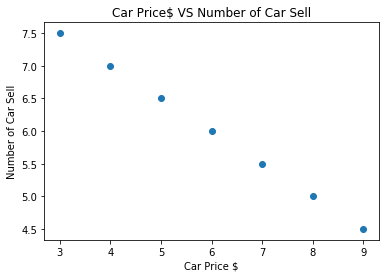

In [11]:
# 作為一家汽車公司，我們從先前的銷售中收集這些數據
# 讓我們定義汽車價格
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# 讓我們定義汽車銷售數量
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# 讓我們視覺化我們的數據
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100$
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- **Steps of Linear Regression**
    1. create LinearRegression class
    1. define model from this LinearRegression class
    1. MSE: Mean squared error
    1. Optimization (SGD:stochastic gradient descent)
    1. Backpropagation
    1. Prediction
- Lets implement it with Pytorch

epoch 0, loss 100.36680603027344
epoch 50, loss 5.119829177856445
epoch 100, loss 3.459683418273926
epoch 150, loss 2.3378536701202393
epoch 200, loss 1.5797855854034424
epoch 250, loss 1.0675270557403564
epoch 300, loss 0.7213728427886963
epoch 350, loss 0.48746100068092346
epoch 400, loss 0.3293973505496979
epoch 450, loss 0.2225877344608307
epoch 500, loss 0.1504119485616684
epoch 550, loss 0.10163945704698563
epoch 600, loss 0.06868204474449158
epoch 650, loss 0.046411603689193726
epoch 700, loss 0.03136250376701355
epoch 750, loss 0.021193111315369606
epoch 800, loss 0.01432115864008665
epoch 850, loss 0.009677545167505741
epoch 900, loss 0.006539616733789444
epoch 950, loss 0.004418928176164627
epoch 1000, loss 0.0029859913047403097


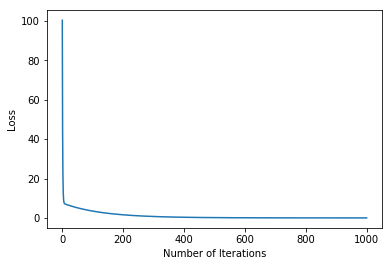

In [12]:
# 使用 Pytorch 進行線性迴歸

# libraries
import torch      
from torch.autograd import Variable     
import torch.nn as nn 
import warnings
warnings.filterwarnings("ignore")

# 創建類別
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everythink in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# 定義模型
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# 優化（找到最小化誤差的參數）
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# 訓練模型
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # 最佳化
    optimizer.zero_grad() 
    
    # 轉發以獲取輸出
    results = model(car_price_tensor)
    
    # 計算損失
    loss = mse(results, number_of_car_sell_tensor)
    
    # 反向傳播
    loss.backward()
    
    # 更新參數
    optimizer.step()
    
    # 儲存損失
    loss_list.append(loss.data)
    
    # 列印損失
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

- Number of iteration is 1001.
- Loss is almost zero that you can see from plot or loss in epoch number 1000.
- Now we have a trained model.
- While usign trained model, lets predict car prices.

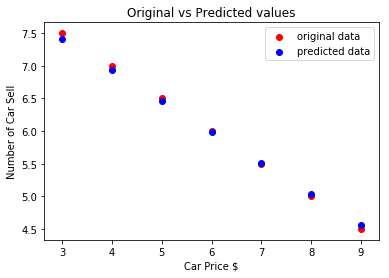

In [13]:
# 預測我們的汽車價格
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# 預測如果汽車價格為 10 美元，汽車銷量是多少
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

<a id="3"></a> <br>
### Logistic Regression
- Linear regression is not good at classification.
- We use logistic regression for classification.
- linear regression + logistic function(softmax) = logistic regression
- Check my deep learning tutorial. There is detailed explanation of logistic regression. 
    - https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- **Steps of Logistic Regression**
    1. Import Libraries
    1. Prepare Dataset
        - We use MNIST dataset.
        - There are 28*28 images and 10 labels from 0 to 9
        - Data is not normalized so we divide each image to 255 that is basic normalization for images.
        - In order to split data, we use train_test_split method from sklearn library
        - Size of train data is 80% and size of test data is 20%.
        - Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need to define variable for accumulation of gradients.
        - batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000 sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data only once we have 336 groups. We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
        - epoch: 1 epoch means training all samples one time.
        - In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate: 
            - training data 1 times = training 33600 sample (because data includes 33600 sample) 
            - But we split our data 336 groups(group_size = batch_size = 100) our data 
            - Therefore, 1 epoch(training data only once) takes 336 iteration
            - We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)
        - TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
        - DataLoader(): It combines dataset and sample. It also provides multi process iterators over the dataset.
        - Visualize one of the images in dataset
    1. Create Logistic Regression Model
        - Same with linear regression.
        - However as you expect, there should be logistic function in model right?
        - In pytorch, logistic function is in the loss function where we will use at next parts.
    1. Instantiate Model
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - create model
    1. Instantiate Loss 
        - Cross entropy loss
        - It calculates loss that is not surprise :)
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer 
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(training).    

In [14]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

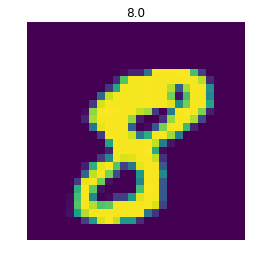

In [15]:
# 準備資料集
# 載入數據
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

# 將資料拆分為特徵（像素）和標籤（數字從 0 到 9）
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# 訓練測試資料分割。訓練資料大小為 80%，測試資料大小為 20%。
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# 建立用於訓練集的特徵和目標張量。你還記得，我們​​需要變數來累積梯度。因此，我們首先創建張量，然後創建變數
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# 為測試集建立特徵和目標張量。
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch 訓練與測試集
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# 資料載入器
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# 視覺化資料集中的其中一張圖片
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [17]:
# 建立邏輯迴歸模型
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # 線性部分
        self.linear = nn.Linear(input_dim, output_dim)
        # 應該要有邏輯函數吧？
        # 但是 PyTorch 中的邏輯函數在損失函數裡。
        # 所以實際上我們不會忘記添加它，它只會在下一部分出現。
    
    def forward(self, x):
        out = self.linear(x)
        return out

# 實例化模型類
input_dim = 28*28 # 影像尺寸 px*px
output_dim = 10  # 標籤 0,1,2,3,4,5,6,7,8,9

# 建立邏輯迴歸模型
model = LogisticRegressionModel(input_dim, output_dim)

# 交叉熵損失  
error = nn.CrossEntropyLoss()

# SGD 最佳化器
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# 訓練模型
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
       # 定義變數
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # 清除漸變
        optimizer.zero_grad()
        
        # 前向傳播
        outputs = model(train)
        
        # 計算softmax和交叉熵損失
        loss = error(outputs, labels)
        
        # 計算梯度
        loss.backward()
        
        # 更新參數
        optimizer.step()
        
        count += 1
        
        # 預測
        if count % 50 == 0:
            # 計算準確度      
            correct = 0
            total = 0
            # 預測測試資料集
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                #前向傳播
                outputs = model(test)
                
                # 根據最大值取得預測
                predicted = torch.max(outputs.data, 1)[1]
                
                # 標籤總數
                total += len(labels)
                
                # 正確預測總數
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # 儲存損失和迭代
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.822865605354309  Accuracy: 69%
Iteration: 1000  Loss: 1.5986465215682983  Accuracy: 76%
Iteration: 1500  Loss: 1.274595856666565  Accuracy: 79%
Iteration: 2000  Loss: 1.1966480016708374  Accuracy: 80%
Iteration: 2500  Loss: 1.0380610227584839  Accuracy: 81%
Iteration: 3000  Loss: 0.9184068441390991  Accuracy: 82%
Iteration: 3500  Loss: 0.9019823670387268  Accuracy: 82%
Iteration: 4000  Loss: 0.742759108543396  Accuracy: 83%
Iteration: 4500  Loss: 0.9660515785217285  Accuracy: 83%
Iteration: 5000  Loss: 0.8014670014381409  Accuracy: 84%
Iteration: 5500  Loss: 0.7462311387062073  Accuracy: 84%
Iteration: 6000  Loss: 0.8664409518241882  Accuracy: 84%
Iteration: 6500  Loss: 0.656282901763916  Accuracy: 84%
Iteration: 7000  Loss: 0.712344765663147  Accuracy: 85%
Iteration: 7500  Loss: 0.6372047662734985  Accuracy: 85%
Iteration: 8000  Loss: 0.7412870526313782  Accuracy: 85%
Iteration: 8500  Loss: 0.5424540042877197  Accuracy: 85%
Iteration: 9000  Loss: 0.660053551197

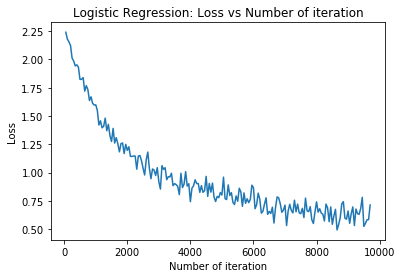

In [19]:
# 視覺化
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

<a id="4"></a> <br>
### Artificial Neural Network (ANN)
- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model.
- In order to increase complexity of model, we need to add more non linear functions as hidden layer. 
- I am saying again that if you do not know what is artificial neural network check my deep learning tutorial because I will not explain neural network detailed here, only explain pytorch.
- Artificial Neural Network tutorial: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.
- **Steps of ANN:**
    1. Import Libraries
        - In order to show you, I import again but we actually imported them at previous parts.
    1. Prepare Dataset
        - Totally same with previous part(logistic regression).
        - We use same dataset so we only need train_loader and test_loader. 
        - We use same batch size, epoch and iteration numbers.
    1. Create ANN Model
        - We add 3 hidden layers.
        - We use ReLU, Tanh and ELU activation functions for diversity.
    1. Instantiate Model Class
        - input_dim = 28*28 # size of image px*px
        - output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9
        - Hidden layer dimension is 150. I only choose it as 150 there is no reason. Actually hidden layer dimension is hyperparameter and it should be chosen and tuned. You can try different values for hidden layer dimension and observe the results.
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to hidden layers model learnt better and accuracy(almost 95%) is better than accuracy of logistic regression model.

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [21]:
# 建立ANN模型
class ANNModel(nn.Module):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        
        # 線性函數 1：784 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # 線性函數 2：150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # 線性函數 3：150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # 非線性3
        self.elu3 = nn.ELU()
        
        # 線性函數 4（讀數）：150 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        #線性函數 1
        out = self.fc1(x)
        # 非線性1
        out = self.relu1(out)
        
        # 線性函數 2
        out = self.fc2(out)
        # 非線性2
        out = self.tanh2(out)
        
        # 線性函數 3
        out = self.fc3(out)
        # 非線性3
        out = self.elu3(out)
        
        # 線性函數4（讀數）
        out = self.fc4(out)
        return out

# 實例化ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# 建立ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# 交叉熵損失
error = nn.CrossEntropyLoss()

# SGD 最佳化器
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [22]:
# ANN模型訓練
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # 清晰的梯度
        optimizer.zero_grad()
        
        # 前向傳播
        outputs = model(train)
        
        # 計算softmax和交叉熵損失
        loss = error(outputs, labels)
        
        # 計算梯度
        loss.backward()
        
        # 更新參數
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # 計算準確度         
            correct = 0
            total = 0
            # 預測測試資料集
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # 前向傳播
                outputs = model(test)
                
                # 根據最大值取得預測
                predicted = torch.max(outputs.data, 1)[1]
                
                # 標籤總數
                total += len(labels)

                # 正確預測總數
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # 儲存損失和迭代
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # 列印損失
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.738267183303833  Accuracy: 81 %
Iteration: 1000  Loss: 0.4530784487724304  Accuracy: 88 %
Iteration: 1500  Loss: 0.2112056165933609  Accuracy: 89 %
Iteration: 2000  Loss: 0.28611698746681213  Accuracy: 90 %
Iteration: 2500  Loss: 0.3111271560192108  Accuracy: 92 %
Iteration: 3000  Loss: 0.11066735535860062  Accuracy: 92 %
Iteration: 3500  Loss: 0.237900048494339  Accuracy: 93 %
Iteration: 4000  Loss: 0.05448126420378685  Accuracy: 94 %
Iteration: 4500  Loss: 0.30320826172828674  Accuracy: 94 %
Iteration: 5000  Loss: 0.10005507618188858  Accuracy: 94 %
Iteration: 5500  Loss: 0.1812765896320343  Accuracy: 95 %
Iteration: 6000  Loss: 0.19749920070171356  Accuracy: 95 %
Iteration: 6500  Loss: 0.08793079107999802  Accuracy: 95 %
Iteration: 7000  Loss: 0.10969942808151245  Accuracy: 95 %
Iteration: 7500  Loss: 0.11304035782814026  Accuracy: 95 %
Iteration: 8000  Loss: 0.17672844231128693  Accuracy: 96 %
Iteration: 8500  Loss: 0.06431673467159271  Accuracy: 96 %
Iterat

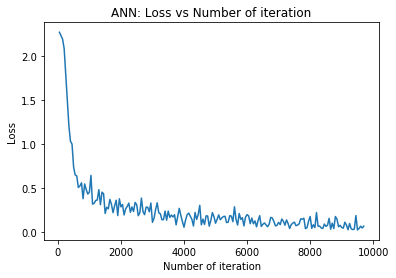

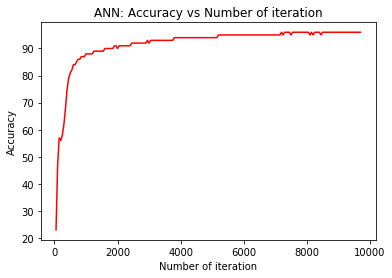

In [23]:
# 視覺化損失
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# 視覺化準確性
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

<a id="5"></a> <br>
### Convolutional Neural Network (CNN)
- CNN is well adapted to classify images.
- You can learn CNN basics: https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial
- **Steps of CNN:**
    1. Import Libraries
    1. Prepare Dataset
        - Totally same with previous parts.
        - We use same dataset so we only need train_loader and test_loader. 
    1. Convolutional layer: 
        - Create feature maps with filters(kernels).
        - Padding: After applying filter, dimensions of original image decreases. However, we want to preserve as much as information about the original image. We can apply padding to increase dimension of feature map after convolutional layer.
        - We use 2 convolutional layer.
        - Number of feature map is out_channels = 16
        - Filter(kernel) size is 5*5
    1. Pooling layer: 
        - Prepares a condensed feature map from output of convolutional layer(feature map) 
        - 2 pooling layer that we will use max pooling.
        - Pooling size is 2*2
    1. Flattening: Flats the features map
    1. Fully Connected Layer: 
        - Artificial Neural Network that we learnt at previous part.
        - Or it can be only linear like logistic regression but at the end there is always softmax function.
        - We will not use activation function in fully connected layer.
        - You can think that our fully connected layer is logistic regression.
        - We combine convolutional part and logistic regression to create our CNN model.
    1. Instantiate Model Class
        - create model
    1. Instantiate Loss
        - Cross entropy loss
        - It also has softmax(logistic function) in it.
    1. Instantiate Optimizer
        - SGD Optimizer
    1. Traning the Model
    1. Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy is increasing and our model is learning(training). 
- Thanks to convolutional layer, model learnt better and accuracy(almost 98%) is better than accuracy of ANN. Actually while tuning hyperparameters, increase in iteration and expanding convolutional neural network can increase accuracy but it takes too much running time that we do not want at kaggle.   
        

In [24]:
# Import Libraries
import torch
import torch.nn as nn
from torch.autograd import Variable

In [26]:
# 創建 CNN 模型
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # 卷積 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # 最大池 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # 卷積 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # 最大池 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # 全連接1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # 卷積 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # 最大池 1
        out = self.maxpool1(out)
        
        # 卷積 2
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # 最大池 2
        out = self.maxpool2(out)
        
        # 扁平化
        out = out.view(out.size(0), -1)

        # 線性函數（讀出）
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch 訓練集和測試集
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# 資料載入器
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# 創建 CNN
model = CNNModel()

# 交叉熵損失
error = nn.CrossEntropyLoss()

# SGD 最佳化器
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [ ]:
# CNN模型訓練
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # 清晰梯度
        optimizer.zero_grad()
        
        #前向傳播
        outputs = model(train)
        
        # 計算softmax和交叉熵損失
        loss = error(outputs, labels)
        
        # 計算梯度
        loss.backward()
        
        # 更新參數
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # 計算準確度         
            correct = 0
            total = 0
            # 迭代測試資料集
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # 前向傳播
                outputs = model(test)
                
                # 根據最大值取得預測
                predicted = torch.max(outputs.data, 1)[1]
                
                # 標籤總數
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # 儲存損失和迭代
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

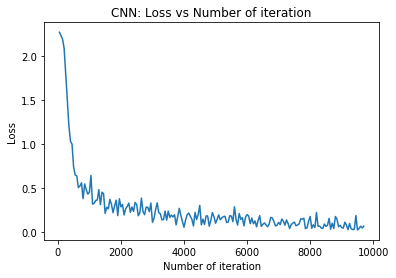

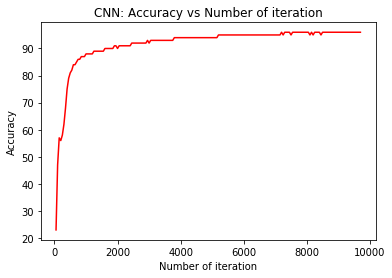

In [27]:
# 視覺化 loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# 視覺化準確性
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

### Conclusion
In this tutorial, we learn: 
1. Basics of pytorch
1. Linear regression with pytorch
1. Logistic regression with pytorch
1. Artificial neural network with with pytorch
1. Convolutional neural network with pytorch
1. Recurrent neural network with pytorch
    - https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch
1. Long-Short Term Memory (LSTM)
    - https://www.kaggle.com/kanncaa1/long-short-term-memory-with-pytorch

<br> **If you have any question or suggest, I will be happy to hear it **